In [1]:
import base64
import datetime
import time
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from numpy import median
import matplotlib.dates as mdates

np.random.seed(1337)
%matplotlib inline
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 12, 8
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

# Load the Data

In [2]:
d = pd.read_csv('input/test_ver2.csv', dtype={
        'age': np.str,
        'antiguedad': np.str,
        'indrel_1mes': np.str,
        'conyuemp': np.str})
len(d)

929615

In [3]:
d.head().T

,0,1,2,3,4
fecha_dato,2016-06-28,2016-06-28,2016-06-28,2016-06-28,2016-06-28
ncodpers,15889,1170544,1170545,1170547,1170548
ind_empleado,F,N,N,N,N
pais_residencia,ES,ES,ES,ES,ES
sexo,V,H,V,H,H
age,56,36,22,22,22
fecha_alta,1995-01-16,2013-08-28,2013-08-28,2013-08-28,2013-08-28
ind_nuevo,0,0,0,0,0
antiguedad,256,34,34,34,34
indrel,1,1,1,1,1


In [4]:
d.dtypes

fecha_dato                object
ncodpers                   int64
ind_empleado              object
pais_residencia           object
sexo                      object
age                       object
fecha_alta                object
ind_nuevo                  int64
antiguedad                object
indrel                     int64
ult_fec_cli_1t            object
indrel_1mes               object
tiprel_1mes               object
indresi                   object
indext                    object
conyuemp                  object
canal_entrada             object
indfall                   object
tipodom                    int64
cod_prov                 float64
nomprov                   object
ind_actividad_cliente      int64
renta                     object
segmento                  object
dtype: object

# Examine Each Feature

## fecha_dato (measurement date)

In [5]:
col_name = 'fecha_dato'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  1
------------------------------ 
top 10 values:
2016-06-28    929615
Name: fecha_dato, dtype: int64
------------------------------ 
bottom 10 values:
2016-06-28    929615
Name: fecha_dato, dtype: int64
------------------------------


## ncodpers (customer code)

In [6]:
col_name = 'ncodpers'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            int64
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  929615
------------------------------ 
top 10 values:
18423      1
1382391    1
733232     1
772143     1
780331     1
778282     1
763939     1
768033     1
765984     1
673823     1
Name: ncodpers, dtype: int64
------------------------------ 
bottom 10 values:
1016666    1
1022809    1
1020760    1
1043287    1
1041238    1
1045332    1
1035091    1
1037136    1
994127     1
26637      1
Name: ncodpers, dtype: int64
------------------------------


## ind_empleado (employment index)

In [8]:
col_name = 'ind_empleado'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  5
------------------------------ 
top 10 values:
N    929096
B       218
F       152
A       148
S         1
Name: ind_empleado, dtype: int64
------------------------------ 
bottom 10 values:
N    929096
B       218
F       152
A       148
S         1
Name: ind_empleado, dtype: int64
------------------------------


A : active

B : ex employed

F : filial

N : not employee

P : pasive

## pais_residencia (country of residence)

In [9]:
col_name = 'pais_residencia'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  118
------------------------------ 
top 10 values:
ES    925619
FR       311
AR       288
GB       286
DE       281
US       231
CO       211
IT       179
RO       175
MX       156
Name: pais_residencia, dtype: int64
------------------------------ 
bottom 10 values:
DJ    1
CD    1
CF    1
BZ    1
BM    1
KW    1
AL    1
ZW    1
TG    1
LB    1
Name: pais_residencia, dtype: int64
------------------------------


## sexo (gender)

In [10]:
col_name = 'sexo'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      5
------------------------------ 
np.na ratio:      5.37857069862e-06
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
V    504515
H    425095
Name: sexo, dtype: int64
------------------------------ 
bottom 10 values:
V    504515
H    425095
Name: sexo, dtype: int64
------------------------------


## age

In [11]:
col_name = 'age'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  118
------------------------------ 
top 10 values:
 24    50706
 23    49604
 22    47674
 21    46322
 25    41429
 26    26672
 43    21592
 20    21509
 44    21242
 45    21132
Name: age, dtype: int64
------------------------------ 
bottom 10 values:
110    20
111    17
112    16
113    10
116     7
114     6
127     1
164     1
117     1
118     1
Name: age, dtype: int64
------------------------------


In [12]:
def fix_number(x):
    try:
        return int(x)
    except:
        return np.nan

In [13]:
d.age = d.age.apply(fix_number)

In [14]:
col_name = 'age'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            int64
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  118
------------------------------ 
top 10 values:
24    50706
23    49604
22    47674
21    46322
25    41429
26    26672
43    21592
20    21509
44    21242
45    21132
Name: age, dtype: int64
------------------------------ 
bottom 10 values:
110    20
111    17
112    16
113    10
116     7
114     6
127     1
117     1
118     1
164     1
Name: age, dtype: int64
------------------------------


In [15]:
d.age.dropna().describe()

count    929615.000000
mean         40.249821
std          17.185119
min           2.000000
25%          25.000000
50%          39.000000
75%          51.000000
max         164.000000
Name: age, dtype: float64

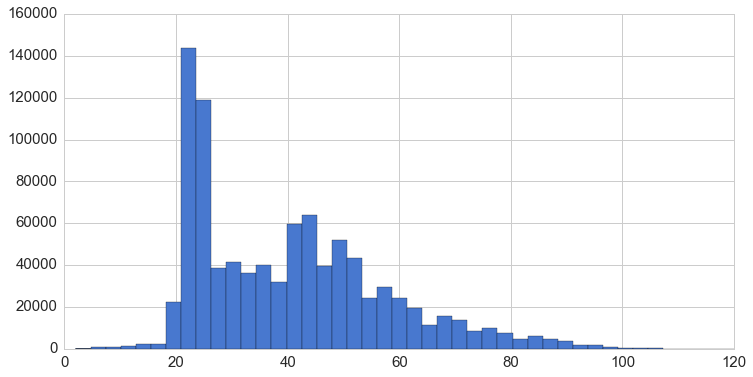

In [16]:
_ = plt.figure(figsize=(12,6))
_ = plt.hist(d.groupby('ncodpers').first().age.dropna(), bins=60)
_ = plt.xlim((0, 120))

## fecha_alta (date of becoming a customer)

In [17]:
col_name = 'fecha_alta'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  6750
------------------------------ 
top 10 values:
2014-07-28    3421
2014-10-03    3355
2014-08-04    2787
2013-10-14    2633
2013-08-03    2013
2015-08-01    1826
2015-07-25    1773
2015-10-10    1728
2012-08-06    1594
2014-07-21    1577
Name: fecha_alta, dtype: int64
------------------------------ 
bottom 10 values:
1995-03-22    1
1995-03-23    1
2013-11-23    1
1995-03-27    1
1995-04-30    1
2004-08-15    1
2014-07-12    1
2010-12-05    1
2010-12-08    1
2013-08-24    1
Name: fecha_alta, dtype: int64
------------------------------


## ind_nuevo (new customer indicator)

In [18]:
col_name = 'ind_nuevo'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            int64
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
0    903726
1     25889
Name: ind_nuevo, dtype: int64
------------------------------ 
bottom 10 values:
0    903726
1     25889
Name: ind_nuevo, dtype: int64
------------------------------


## antiguedad (customer seniority in months)

In [19]:
col_name = 'antiguedad'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  259
------------------------------ 
top 10 values:
      8    26335
     32    23415
      9    22972
     20    21108
     11    20420
     44    18531
     21    17923
     56    16238
     23    15940
     34    15559
Name: antiguedad, dtype: int64
------------------------------ 
bottom 10 values:
    251    419
    238    325
    253    244
    250    191
    254    152
      0    129
    257    102
    255     84
    256     77
-999999      3
Name: antiguedad, dtype: int64
------------------------------


In [20]:
d.antiguedad = d.antiguedad.apply(fix_number)
d.loc[d.antiguedad < 0, 'antiguedad'] = np.nan

In [21]:
col_name = 'antiguedad'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      3
------------------------------ 
np.na ratio:      3.22714241917e-06
------------------------------ 
distinct values:  258
------------------------------ 
top 10 values:
8.0     26335
32.0    23415
9.0     22972
20.0    21108
11.0    20420
44.0    18531
21.0    17923
56.0    16238
23.0    15940
34.0    15559
Name: antiguedad, dtype: int64
------------------------------ 
bottom 10 values:
252.0    443
251.0    419
238.0    325
253.0    244
250.0    191
254.0    152
0.0      129
257.0    102
255.0     84
256.0     77
Name: antiguedad, dtype: int64
------------------------------


In [22]:
d.antiguedad.dropna().describe()

count    929612.000000
mean         80.955814
std          67.241802
min           0.000000
25%          23.000000
50%          55.000000
75%         136.000000
max         257.000000
Name: antiguedad, dtype: float64

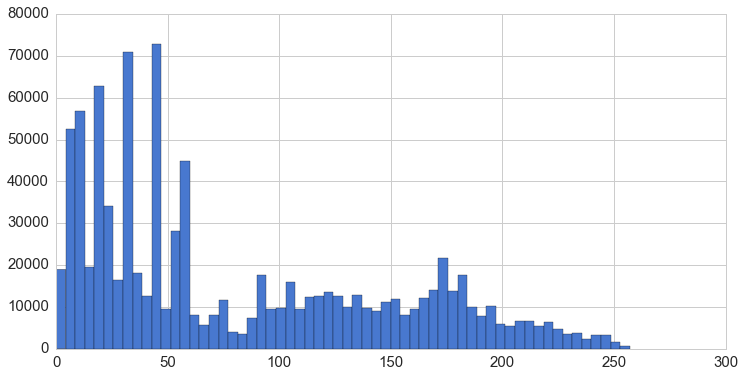

In [23]:
_ = plt.figure(figsize=(12,6))
_ = plt.hist(d.groupby('ncodpers').first().antiguedad.dropna(), bins=60)

## indrel (primary customer indicator)

In [24]:
col_name = 'indrel'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            int64
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
1     927932
99      1683
Name: indrel, dtype: int64
------------------------------ 
bottom 10 values:
1     927932
99      1683
Name: indrel, dtype: int64
------------------------------


1  : primary customer

99 : primary customer during the month but not at the end of the month

## ult_fec_cli_1t (last date as primary customer if he isn't at the end of the month)

In [25]:
col_name = 'ult_fec_cli_1t'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      927932
------------------------------ 
np.na ratio:      0.998189573103
------------------------------ 
distinct values:  21
------------------------------ 
top 10 values:
2016-06-01    138
2016-06-10    133
2016-06-03    110
2016-06-07    102
2016-06-06    101
2016-06-20     84
2016-06-13     84
2016-06-17     78
2016-06-23     78
2016-06-15     78
Name: ult_fec_cli_1t, dtype: int64
------------------------------ 
bottom 10 values:
2016-06-02    75
2016-06-09    75
2016-06-22    72
2016-06-21    70
2016-06-24    64
2016-06-16    62
2016-06-08    60
2016-06-27    58
2016-06-28    49
2016-06-29    36
Name: ult_fec_cli_1t, dtype: int64
------------------------------


## indrel_1mes (customer type at the beginning of the month)

In [26]:
col_name = 'indrel_1mes'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      23
------------------------------ 
np.na ratio:      2.47414252137e-05
------------------------------ 
distinct values:  4
------------------------------ 
top 10 values:
1.0    611755
1      317810
3          15
3.0        12
Name: indrel_1mes, dtype: int64
------------------------------ 
bottom 10 values:
1.0    611755
1      317810
3          15
3.0        12
Name: indrel_1mes, dtype: int64
------------------------------


In [27]:
def fix_customer_type(x):
    if x == 'P':
        return 'P'
    else:
        try:
            return str(int(x))
        except:
            return np.nan

In [28]:
d.indrel_1mes = d.indrel_1mes.apply(fix_customer_type)

In [29]:
col_name = 'indrel_1mes'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      611790
------------------------------ 
np.na ratio:      0.658111153542
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
1    317810
3        15
Name: indrel_1mes, dtype: int64
------------------------------ 
bottom 10 values:
1    317810
3        15
Name: indrel_1mes, dtype: int64
------------------------------


1 : primary customer

2 : co-owner

3 : former primary

4 : former co-owner

P : potential

## tiprel_1mes (customer relation type at the beginning of the month)

In [30]:
col_name = 'tiprel_1mes'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      23
------------------------------ 
np.na ratio:      2.47414252137e-05
------------------------------ 
distinct values:  3
------------------------------ 
top 10 values:
I    535943
A    393622
P        27
Name: tiprel_1mes, dtype: int64
------------------------------ 
bottom 10 values:
I    535943
A    393622
P        27
Name: tiprel_1mes, dtype: int64
------------------------------


A : active

I : inactive

P : former customer

R : potential

## indresi (indicator of the residence and the bank being in the same country)

In [31]:
col_name = 'indresi'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
S    925620
N      3995
Name: indresi, dtype: int64
------------------------------ 
bottom 10 values:
S    925620
N      3995
Name: indresi, dtype: int64
------------------------------


S : same

N : different

## indext (indicator if the birth country is different from bank country)

In [32]:
col_name = 'indext'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
N    883548
S     46067
Name: indext, dtype: int64
------------------------------ 
bottom 10 values:
N    883548
S     46067
Name: indext, dtype: int64
------------------------------


S : different

N : same

## conyuemp (indicator if the customer is the spouse of an employee)

In [33]:
col_name = 'conyuemp'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      929511
------------------------------ 
np.na ratio:      0.999888125729
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
N    103
S      1
Name: conyuemp, dtype: int64
------------------------------ 
bottom 10 values:
N    103
S      1
Name: conyuemp, dtype: int64
------------------------------


## canal_entrada (channel used by the customer to join)

In [34]:
col_name = 'canal_entrada'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      2081
------------------------------ 
np.na ratio:      0.00223856112477
------------------------------ 
distinct values:  162
------------------------------ 
top 10 values:
KHE    251665
KAT    205833
KFC    200697
KHQ     74969
KHM     33384
KFA     25653
KHN     18131
KHK     16918
KHD      7390
RED      6328
Name: canal_entrada, dtype: int64
------------------------------ 
bottom 10 values:
KEM    4
KHA    3
KGU    2
KGC    2
KDB    1
KDL    1
025    1
KHR    1
KDI    1
KGN    1
Name: canal_entrada, dtype: int64
------------------------------


## indfall (dead indicator)

In [35]:
col_name = 'indfall'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
N    927215
S      2400
Name: indfall, dtype: int64
------------------------------ 
bottom 10 values:
N    927215
S      2400
Name: indfall, dtype: int64
------------------------------


## tipodom (address type)

In [36]:
col_name = 'tipodom'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            int64
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  1
------------------------------ 
top 10 values:
1    929615
Name: tipodom, dtype: int64
------------------------------ 
bottom 10 values:
1    929615
Name: tipodom, dtype: int64
------------------------------


## cod_prov (address code)

In [37]:
col_name = 'cod_prov'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      3996
------------------------------ 
np.na ratio:      0.00429855370234
------------------------------ 
distinct values:  52
------------------------------ 
top 10 values:
28.0    298250
8.0      88579
46.0     47996
41.0     40492
15.0     28715
30.0     27752
29.0     24546
50.0     23160
3.0      22147
11.0     19795
Name: cod_prov, dtype: int64
------------------------------ 
bottom 10 values:
49.0    3430
34.0    3311
40.0    2881
22.0    2789
5.0     2628
1.0     2591
44.0    1538
42.0    1261
52.0     643
51.0     513
Name: cod_prov, dtype: int64
------------------------------


## nomprov (address name)

In [38]:
col_name = 'nomprov'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      3996
------------------------------ 
np.na ratio:      0.00429855370234
------------------------------ 
distinct values:  52
------------------------------ 
top 10 values:
MADRID       298250
BARCELONA     88579
VALENCIA      47996
SEVILLA       40492
CORUÑA, A     28715
MURCIA        27752
MALAGA        24546
ZARAGOZA      23160
ALICANTE      22147
CADIZ         19795
Name: nomprov, dtype: int64
------------------------------ 
bottom 10 values:
ZAMORA      3430
PALENCIA    3311
SEGOVIA     2881
HUESCA      2789
AVILA       2628
ALAVA       2591
TERUEL      1538
SORIA       1261
MELILLA      643
CEUTA        513
Name: nomprov, dtype: int64
------------------------------


## ind_actividad_cliente (activity indicator)

In [39]:
col_name = 'ind_actividad_cliente'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            int64
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  2
------------------------------ 
top 10 values:
0    534276
1    395339
Name: ind_actividad_cliente, dtype: int64
------------------------------ 
bottom 10 values:
0    534276
1    395339
Name: ind_actividad_cliente, dtype: int64
------------------------------


1 : active

0 : inactive

## renta (gross income of the household)

In [40]:
col_name = 'renta'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      0
------------------------------ 
np.na ratio:      0.0
------------------------------ 
distinct values:  516403
------------------------------ 
top 10 values:
         NA    227965
  451931.22       354
  463625.16       111
  128318.52        91
  181042.20        91
  105260.88        90
  488798.49        84
  127141.50        73
  283325.67        70
  132335.73        67
Name: renta, dtype: int64
------------------------------ 
bottom 10 values:
   63758.94    1
   63758.91    1
  107575.86    1
   56520.63    1
  122707.26    1
   83673.30    1
   47599.47    1
  113420.31    1
   50551.44    1
  114483.54    1
Name: renta, dtype: int64
------------------------------


In [41]:
d.loc[d.renta == '         NA', 'renta'] = np.nan
d.renta = d.renta.astype(float)

In [42]:
col_name = 'renta'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            float64
------------------------------ 
np.na count:      227965
------------------------------ 
np.na ratio:      0.245225173862
------------------------------ 
distinct values:  516402
------------------------------ 
top 10 values:
451931.22    354
463625.16    111
181042.20     91
128318.52     91
105260.88     90
488798.49     84
127141.50     73
283325.67     70
132335.73     67
236690.34     67
Name: renta, dtype: int64
------------------------------ 
bottom 10 values:
57714.39     1
54004.59     1
119457.39    1
86670.87     1
319321.71    1
193227.72    1
110094.21    1
141067.95    1
58387.86     1
27832.50     1
Name: renta, dtype: int64
------------------------------


In [43]:
d.renta.dropna().describe()

count    7.016500e+05
mean     1.340879e+05
std      2.323120e+05
min      1.202730e+03
25%      6.849114e+04
50%      1.014905e+05
75%      1.555408e+05
max      2.889440e+07
Name: renta, dtype: float64

In [44]:
d.renta.dropna().quantile(0.95)

310008.39000000001

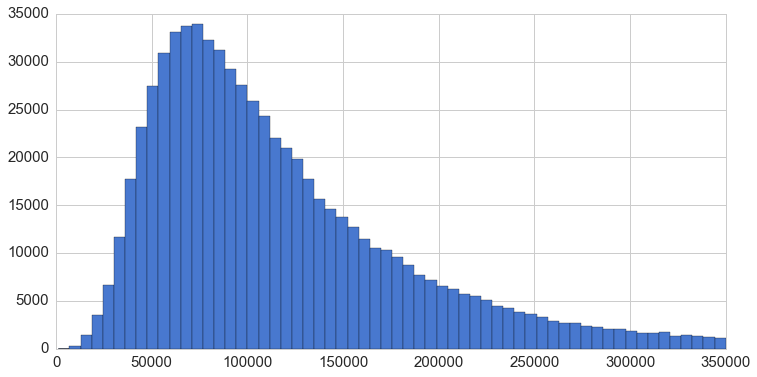

In [45]:
_ = plt.figure(figsize=(12,6))
_ = plt.hist(d[d.renta <= 350000].groupby('ncodpers').first().renta.dropna(), bins=60)

## segmento (customer segment)

In [46]:
col_name = 'segmento'

print '-' * 30, '\n', 'dtype:           ', d[col_name].dtype
print '-' * 30, '\n', 'np.na count:     ', d[col_name].isnull().sum()
print '-' * 30, '\n', 'np.na ratio:     ', 1.0 * d[col_name].isnull().sum() / len(d)
print '-' * 30, '\n', 'distinct values: ', len(d[col_name].value_counts())
print '-' * 30, '\n', 'top 10 values:'
print d[col_name].value_counts().head(10)
print '-' * 30, '\n', 'bottom 10 values:'
print d[col_name].value_counts().tail(10)
print '-' * 30

------------------------------ 
dtype:            object
------------------------------ 
np.na count:      2248
------------------------------ 
np.na ratio:      0.0024182053861
------------------------------ 
distinct values:  3
------------------------------ 
top 10 values:
02 - PARTICULARES     545378
03 - UNIVERSITARIO    346028
01 - TOP               35961
Name: segmento, dtype: int64
------------------------------ 
bottom 10 values:
02 - PARTICULARES     545378
03 - UNIVERSITARIO    346028
01 - TOP               35961
Name: segmento, dtype: int64
------------------------------


1 : VIP

2 : individual

3 : college graduated